In [29]:
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sympy.stats import Bernoulli, sample_iter

15. Consider the following procedure.

• Set n = 100 and draw n continuous values x_i uniformly distributed between 0 and 10. Then simulate data from the model `y_i = a + bx_i + error_i`, for `i = 1,…,n, with a = 2, b = 3`, and independent errors from a normal distribution.

• Regress y on x. Look at the median and mad sd of b. Check to see if the interval formed by the median ± 2 mad sd includes the true value, b = 3.

• Repeat the above two steps 1000 times.

(a) True or false: You would expect the interval to contain the true value approximately 950 times. Explain your answer (in one sentence).

(b) Same as above, except the error distribution is bimodal, not normal. True or false: You would expect the interval to contain the true value approximately 950 times. Explain your answer (in one sentence).

In [20]:
x = [random.randint(0, 10) for i in range(100)]
y = [2 + 3 * _x + random.normalvariate(0, 1) for _x in x]

In [23]:
mod = sm.OLS(y, sm.add_constant(x))

res = mod.fit(q=0.5)

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7151.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.12e-93
Time:                        09:08:45   Log-Likelihood:                -150.87
No. Observations:                 100   AIC:                             305.7
Df Residuals:                      98   BIC:                             310.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1504      0.202     10.620      0.0

In [39]:
# 'robust' mad
print(sm.robust.scale.mad(x, axis=0))

4.447806655516806


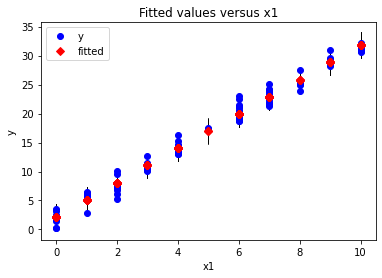

In [27]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res, 1, ax=ax)

#### Boostrap 

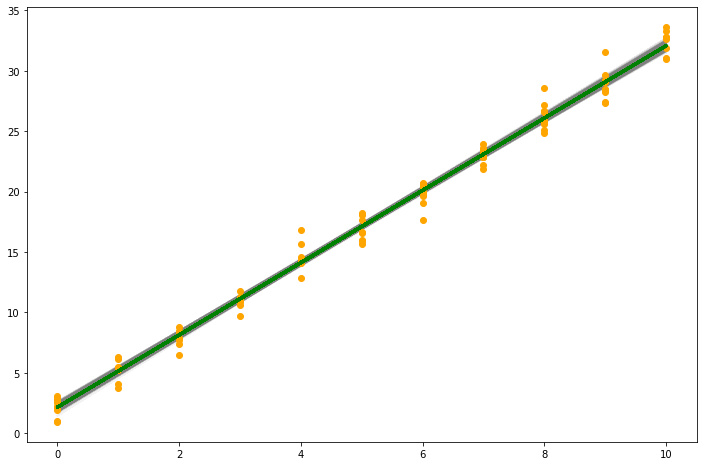

In [31]:
x = np.array([random.randint(0, 10) for i in range(100)])
y = np.array([2 + 3 * _x + random.normalvariate(0, 1) for _x in x])

X = np.vstack([x, np.ones(len(x))]).T

plt.figure(figsize=(12,8))

for i in range(0, 1000):
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(x, lr.predict(X), color='grey', alpha=0.1, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

lr = LinearRegression()
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='green', linewidth=3, zorder=5)
plt.show()

### Responses

a.) True. Two standard deviations from the median should result in a confidence interval where 95% of estimates contain the actual value.

b.) True because of the CLT